# Privacy TP 2
Tientso Ning

In [242]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.util import view_as_blocks
%matplotlib inline

(250, 250)


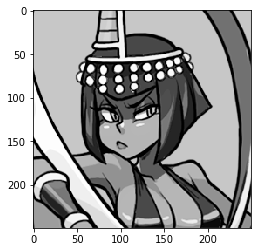

In [7]:
#read the image liftingbody
img = cv2.imread("eliza.png",0)
plt.imshow(img, cmap="Greys_r")
print(img.shape)

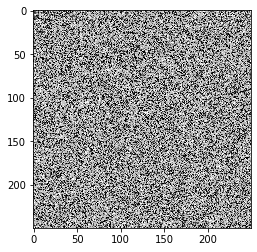

In [10]:
#create a permutation matrix
id_mat = np.identity(img.shape[0])
perm = np.random.permutation(np.copy(img).flatten())
perm_img = np.reshape(perm, img.shape)
plt.imshow(perm_img, cmap="Greys_r")

Text(0.5, 1.0, 'Permuted Image')

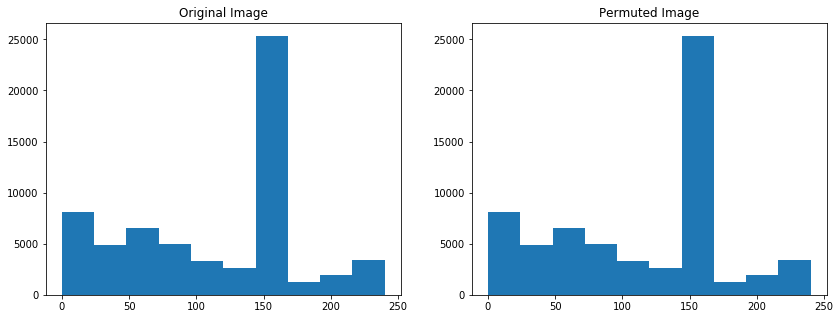

In [17]:
#do the histogram of both and compare
f, ax = plt.subplots(1,2, figsize=(14,5))
ax[0].hist(img.flatten())
ax[0].set_title("Original Image")
ax[1].hist(perm_img.flatten())
ax[1].set_title("Permuted Image")

Here we can see that no information was lost, since the histograms show that the two images contains the exact same distribution of pixel values meaning that the image values were simply moved around.

In [273]:
#model block loss
def block_loss(img, N, M):
    loss = np.copy(img)
    
    #random location for block loss
    x = np.random.randint(0, img.shape[0])
    loss[x:x+N,x:x+M] = 0
    
    return loss

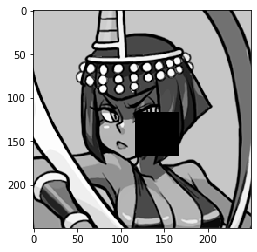

In [279]:
plt.imshow(block_loss(img, 50,50), cmap="Greys_r")